## Universidad de los Andes

## Facultad de Ingeniería

Departamento de Ingeniería Industrial

Maestría en Inteligencia Analítica de Datos

Materia: Despliegue de Soluciones Analíticas

Taller Grupal 3 Despliegue de Soluciones Analíticas

Bogotá, octubre de 2025

Estudiantes:
*   Diego Alejandro Lemus Guzmán
*   Valeria Iglesias Miranda
*   Sergio Andrés Perdomo Murcia
*   Danilo Suárez Vargas

## Taller Grupal 3 Despliegue de Soluciones Analíticas - Exploracion de la base de datos del proyecto

# Objetivo
Realizar una exploración de datos exhaustiva de los datos del proyecto, identificando de datos faltantes, análisis univariado y bivariado de las dimensiones, que sirvan de soporte para poder documentar los hallazgos clave.

In [1]:
# Librerias a emplear
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Primeras filas del DataFrame, información general (tipos de datos, número de filas y columnas)
# estadísticas descriptivas de las columnas numéricas.

df_anuncios = pd.read_csv('/content/data_clean_anuncios.csv')

display(df_anuncios.head())
display(df_anuncios.info())
display(df_anuncios.describe())

,anuncio,valor_cop,tipo,city,Ciudad,Estado,area,Cuartos,bano,habitaciones
0,Desde $ 223.000.000\n\nLocal Comercial en Bell...,223000000,Local,Antioquia\n\nUnidades desde:\n\n1 Ambiente\n1...,Bello,Local En Venta En Bello,10.880,8,NaN,p
1,Desde $ 683.600.000\n\nApartamento en El Retir...,683600000,Apartamento,Antioquia\n\nUnidades desde:\n\n1 Hab\n2 Baño...,El Retiro,Apartamento En Venta En El Retiro,55.020,2,NaN,1
2,"Desde $ 540.000.000\n\nLote en La ceja, Antioq...",540000000,Lote,Antioquia\n\nUnidades desde:\n\n1.246 m²\nCat...,La ceja,Lote En Venta En La Ceja,1.246,6,NaN,p
3,"Desde $ 243.000.000\n\nApartamento en Caldas, ...",243000000,Apartamento,Antioquia\n\nUnidades desde:\n\n2 Habs.\n2 Ba...,Caldas,Apartamento En Venta En Caldas,50.900,2,NaN,2
4,Desde $ 245.000.000\n\nApartaestudio en Caldas...,245000000,Apartaestudio,Antioquia\n\nUnidades desde:\n\n2 Habs.\n2 Ba...,Caldas,Apartaestudio En Venta En Caldas,52.410,2,NaN,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anuncio       657 non-null    object 
 1   valor_cop     657 non-null    int64  
 2   tipo          657 non-null    object 
 3   city          653 non-null    object 
 4   Ciudad        657 non-null    object 
 5   Estado        647 non-null    object 
 6   area          657 non-null    float64
 7   Cuartos       657 non-null    int64  
 8   bano          0 non-null      float64
 9   habitaciones  657 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 51.5+ KB


None

,valor_cop,area,Cuartos,bano
count,6.570000e+02,657.000000,657.000000,0.0
mean,4.343351e+08,94.665595,1.958904,NaN
std,3.660674e+08,219.353644,1.086145,NaN
min,5.500000e+07,1.000000,0.000000,NaN
25%,2.171360e+08,47.140000,1.000000,NaN
50%,3.391204e+08,58.930000,2.000000,NaN
75%,5.300000e+08,76.500000,2.000000,NaN
max,3.753300e+09,2484.800000,9.000000,NaN


Variables para el modelo de regresión:

- 'valor_cop': Esta es la variable objetivo, representando el precio del inmueble en pesos colombianos. Ésta es la variable que se busca predecir.
- 'area': Representa el área del inmueble en metros cuadrados. Se espera que tengamos una correlación fuerte directamente proporcional con el valor del inmueble.
- 'Cuartos': Número de habitaciones. A mayor número de habitaciones puede aumentar el valor de un inmueble. Pero no necesariamente puede que sea correlacionado
- 'bano': Representa el número de baños. Similar al la variable anterior.
- 'tipo': Describe el tipo de inmueble (Apartamento, Casa, Lote, Local, etc.). Tambien sirve para determinar el valor pero no es tan determinante.
- 'Ciudad': Ciudad donde se encuentra el inmueble. La ubicación es un factor fuerte en el valor de la propiedad, ya que los precios pueden variar entre ciudades.
- 'Estado': Podría ser útil más adelante para extraer información adicional.

In [3]:
## Identificacion y gestion de datos faltantes
missing_values = df_anuncios.isnull().sum()
print("Número de valores faltantes por columna:")
print(missing_values)

missing_percentage = (missing_values / len(df_anuncios)) * 100
print("\nPorcentaje de valores faltantes por columna:")
print(missing_percentage)

Número de valores faltantes por columna:
anuncio           0
valor_cop         0
tipo              0
city              4
Ciudad            0
Estado           10
area              0
Cuartos           0
bano            657
habitaciones      0
dtype: int64

Porcentaje de valores faltantes por columna:
anuncio           0.000000
valor_cop         0.000000
tipo              0.000000
city              0.608828
Ciudad            0.000000
Estado            1.522070
area              0.000000
Cuartos           0.000000
bano            100.000000
habitaciones      0.000000
dtype: float64


## Propuestas para el manejo de valores faltantes por columna:
- 'bano': Todos los valores faltantes. Se propone eliminar esta columna.
- 'city': 0.61% valores faltantes. Se propone eliminar esta columna, dado que la columna 'Ciudad' proporciona información ya normalizada sin faltantes.
- 'Estado': 1.52% valores faltantes. Se propone eliminar esta columna, ya que la normalizacion de estos datos no ofrecerán info relevante para su uso.

## Análisis univariado de las variables

In [4]:
print("Distribucion de frecuencia por 'tipo':")
display(df_anuncios['tipo'].value_counts())

print("\nDistribucion de frecuencia por 'Ciudad':")
display(df_anuncios['Ciudad'].value_counts())

print("\nDistribucion de frecuencia por 'habitaciones':")
display(df_anuncios['habitaciones'].value_counts())

Distribucion de frecuencia por 'tipo':


,count
tipo,
Apartamento,549
Casa,71
Lote,24
Apartaestudio,8
Local,3
Oficina,2



Distribucion de frecuencia por 'Ciudad':


,count
Ciudad,
Bochalema,15
Miramar,12
Fontibon,12
Lagos de Torca,9
Valle del Lili,9
...,...
Ub libano 2000,1
Mt centauros,1
Caudal norte oriental,1



Distribucion de frecuencia por 'habitaciones':


,count
habitaciones,
2,287
3,199
1,134
p,27
4,7
r,2
5,1


/tmp/ipython-input-2469311470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_anuncios, y='tipo', order=df_anuncios['tipo'].value_counts().index, palette='viridis')


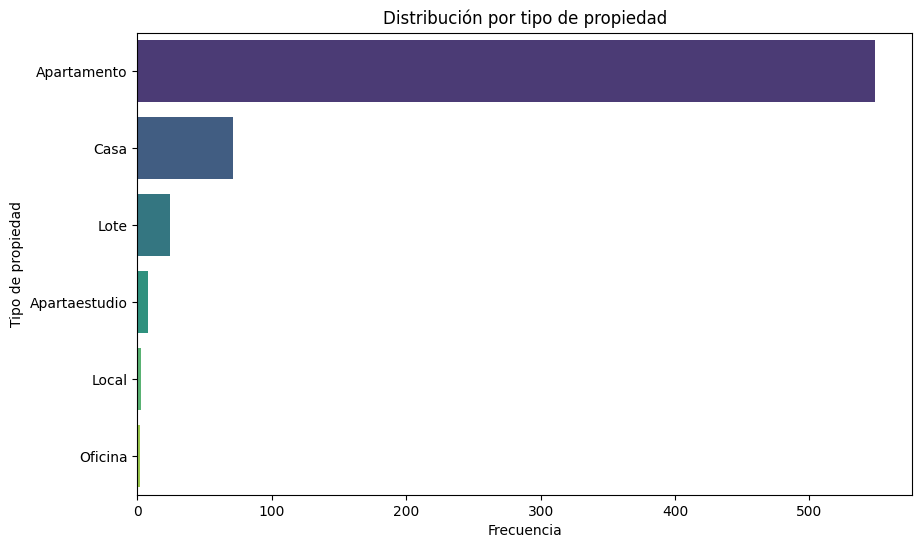

/tmp/ipython-input-2469311470.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_anuncios, y='Ciudad', order=df_anuncios['Ciudad'].value_counts().index[:20], palette='viridis')


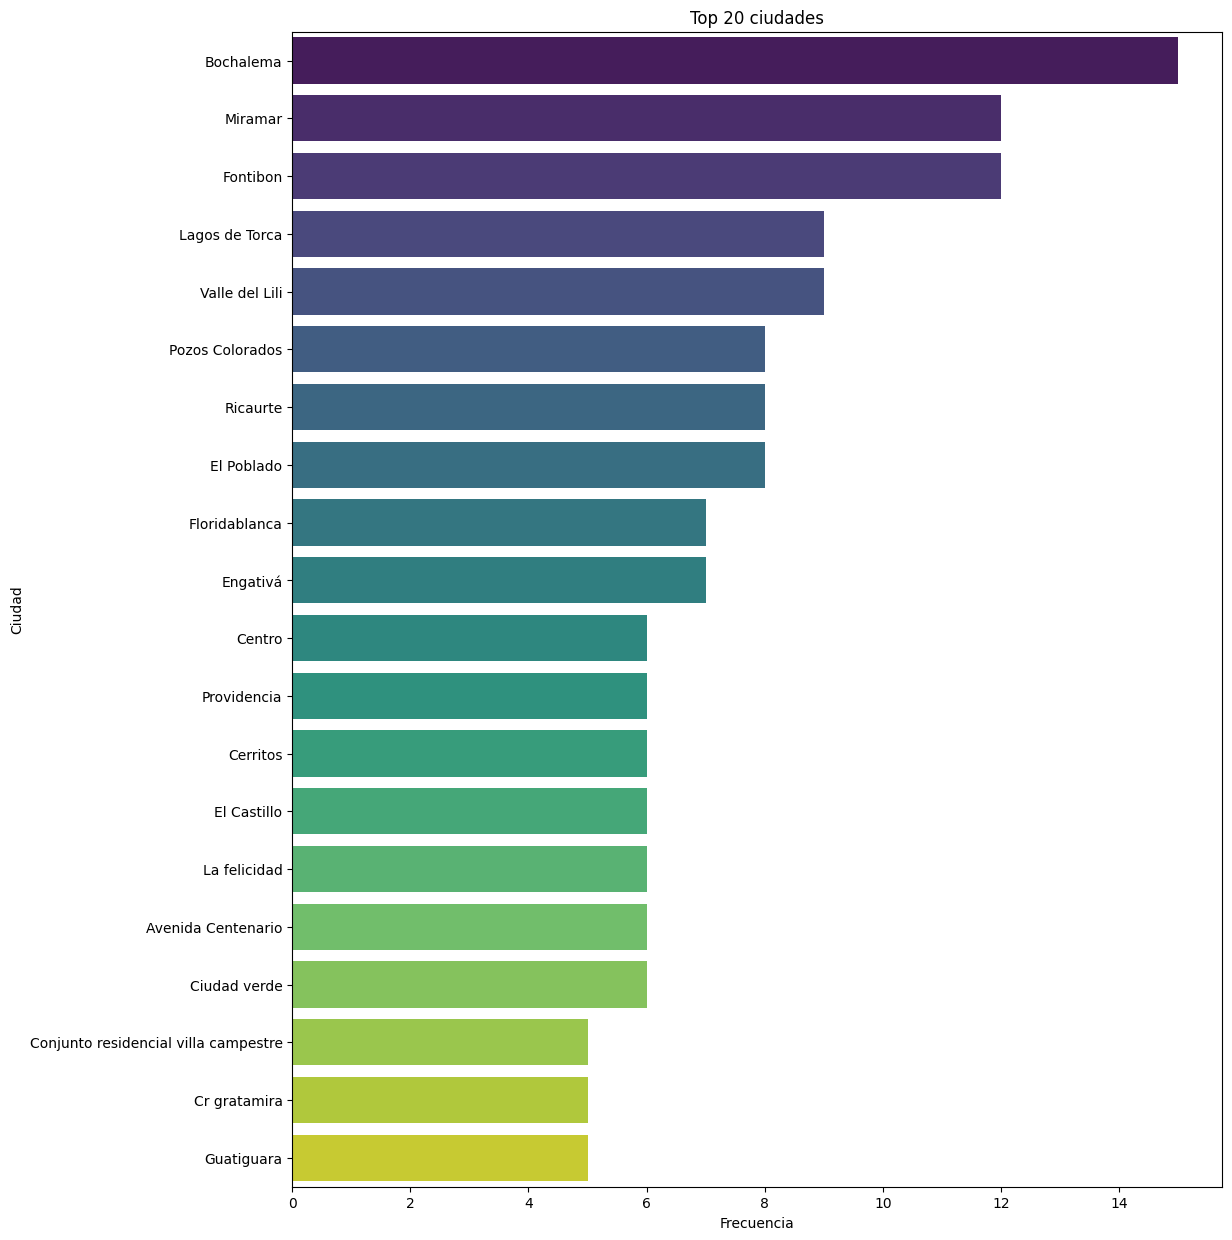

/tmp/ipython-input-2469311470.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_anuncios, y='habitaciones', order=df_anuncios['habitaciones'].value_counts().index, palette='viridis')


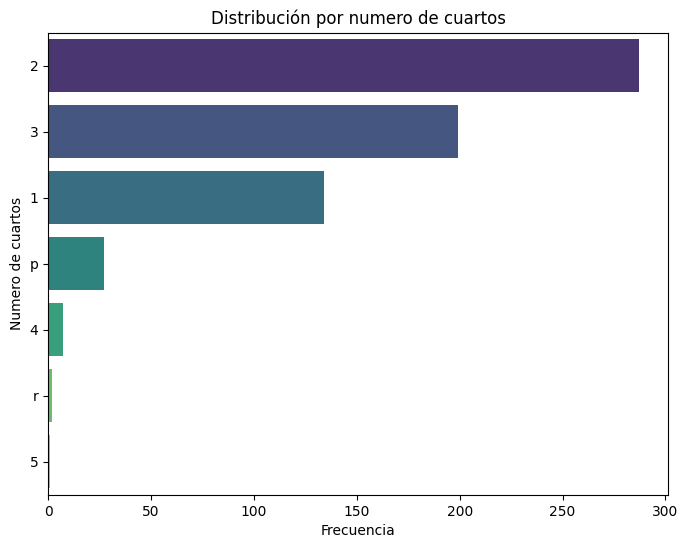

In [5]:
# Graficas de distribución
# Grafica 1
plt.figure(figsize=(10, 6))
sns.countplot(data=df_anuncios, y='tipo', order=df_anuncios['tipo'].value_counts().index, palette='viridis')
plt.title('Distribución por tipo de propiedad')
plt.xlabel('Frecuencia')
plt.ylabel('Tipo de propiedad')
plt.show()

# Grafica 2
plt.figure(figsize=(12, 15))
sns.countplot(data=df_anuncios, y='Ciudad', order=df_anuncios['Ciudad'].value_counts().index[:20], palette='viridis')
plt.title('Top 20 ciudades')
plt.xlabel('Frecuencia')
plt.ylabel('Ciudad')
plt.show()

# Grafica 3
plt.figure(figsize=(8, 6))
sns.countplot(data=df_anuncios, y='habitaciones', order=df_anuncios['habitaciones'].value_counts().index, palette='viridis')
plt.title('Distribución por numero de cuartos')
plt.xlabel('Frecuencia')
plt.ylabel('Numero de cuartos')
plt.show()

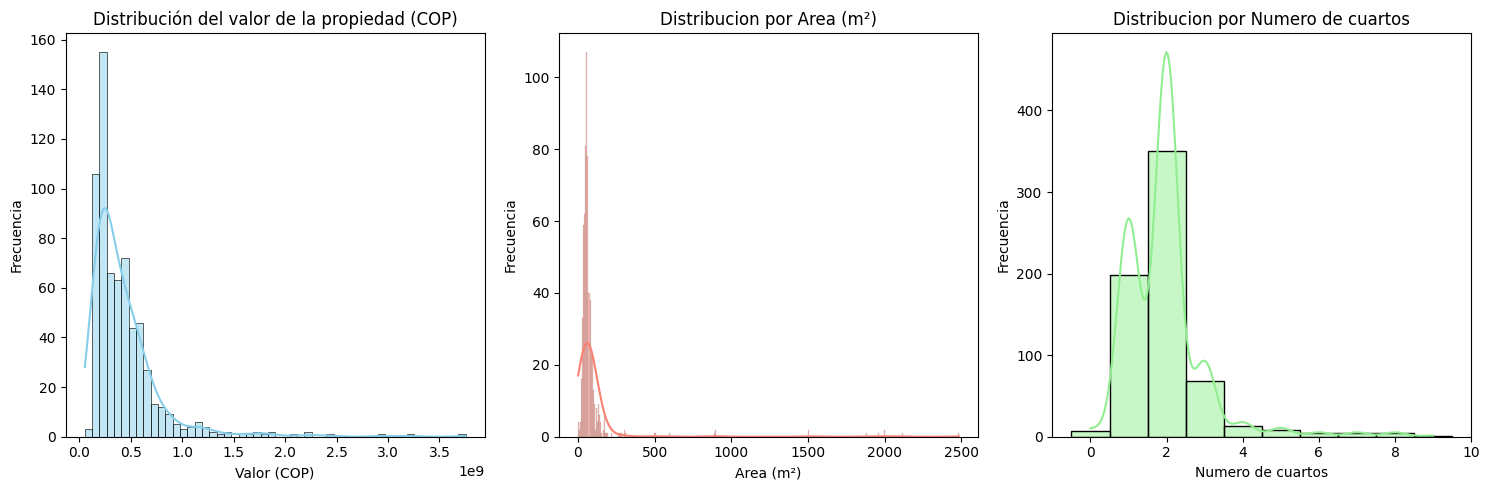

In [6]:
# Histogramas de distribucion
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_anuncios['valor_cop'], kde=True, color='skyblue')
plt.title('Distribución del valor de la propiedad (COP)')
plt.xlabel('Valor (COP)')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
sns.histplot(df_anuncios['area'], kde=True, color='salmon')
plt.title('Distribucion por Area (m²)')
plt.xlabel('Area (m²)')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
sns.histplot(df_anuncios['Cuartos'], kde=True, color='lightgreen', discrete=True)
plt.title('Distribucion por Numero de cuartos')
plt.xlabel('Numero de cuartos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

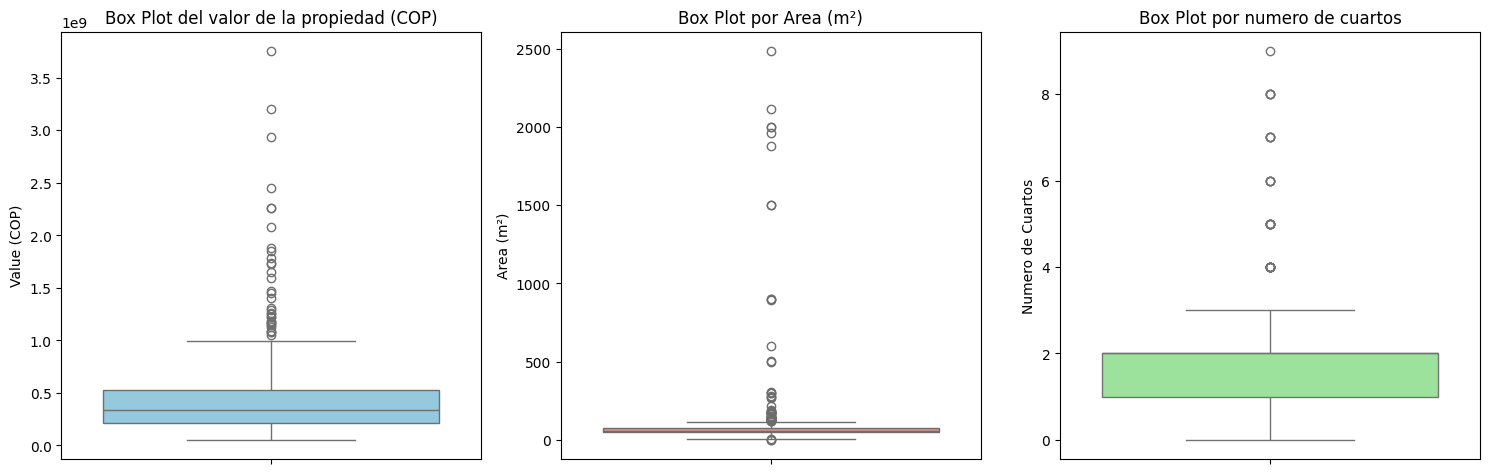

In [7]:
# BoxPlots de variables
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df_anuncios['valor_cop'], color='skyblue')
plt.title('Box Plot del valor de la propiedad (COP)')
plt.ylabel('Value (COP)')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_anuncios['area'], color='salmon')
plt.title('Box Plot por Area (m²)')
plt.ylabel('Area (m²)')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_anuncios['Cuartos'], color='lightgreen')
plt.title('Box Plot por numero de cuartos')
plt.ylabel('Numero de Cuartos')

plt.tight_layout()
plt.show()

## Análisis bivariado y multivariado

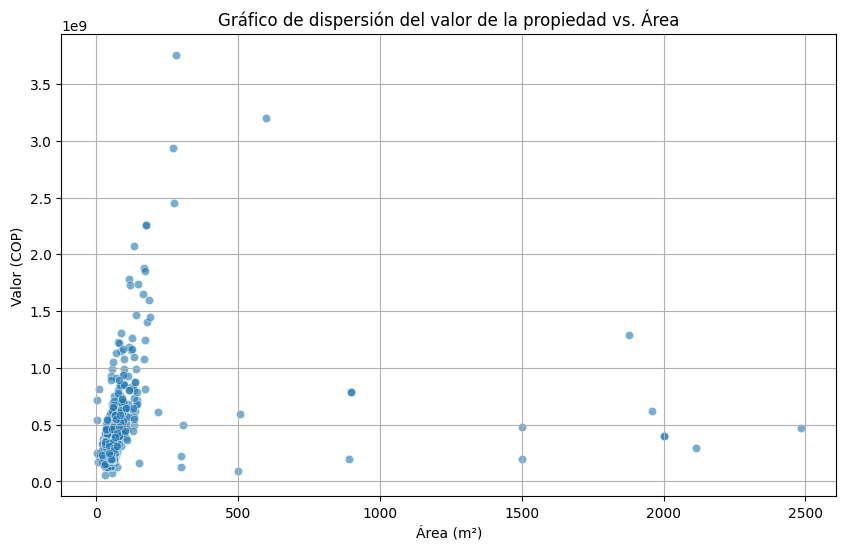

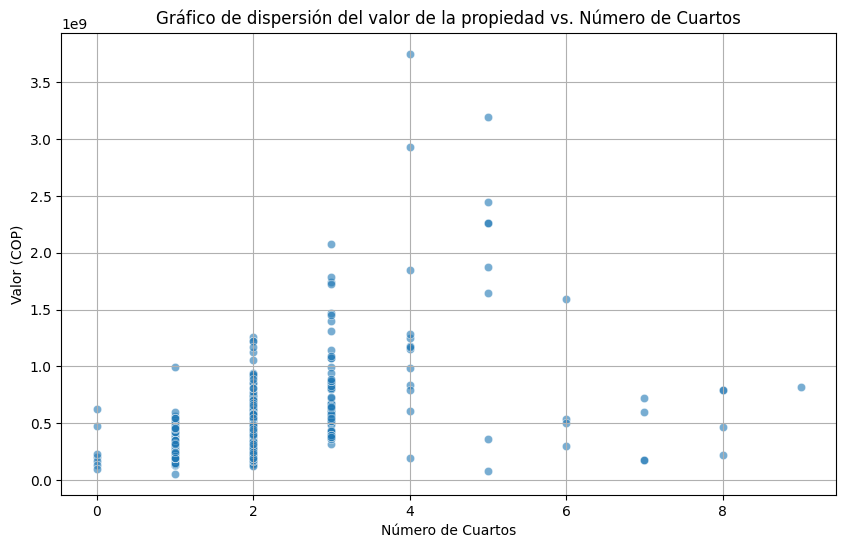


Matriz de Correlación:


,valor_cop,area,Cuartos
valor_cop,1.000000,0.164271,0.483583
area,0.164271,1.000000,0.296932
Cuartos,0.483583,0.296932,1.000000


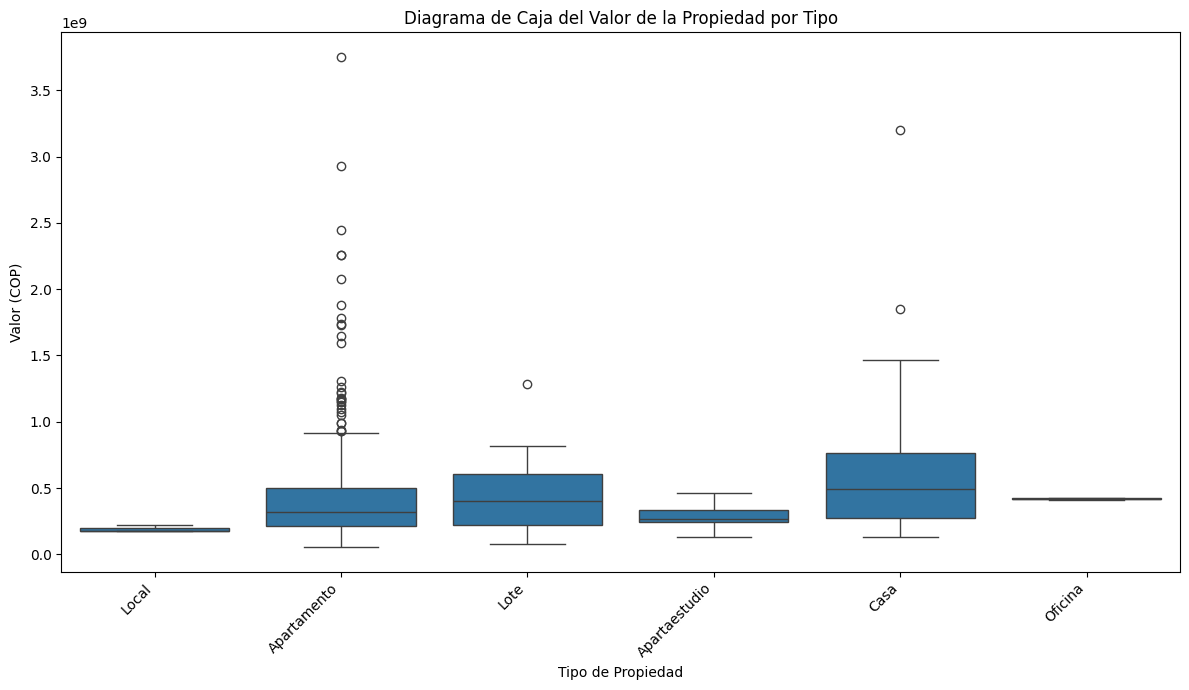

/tmp/ipython-input-361232733.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_value_by_city.index, y=mean_value_by_city.values, palette='viridis')


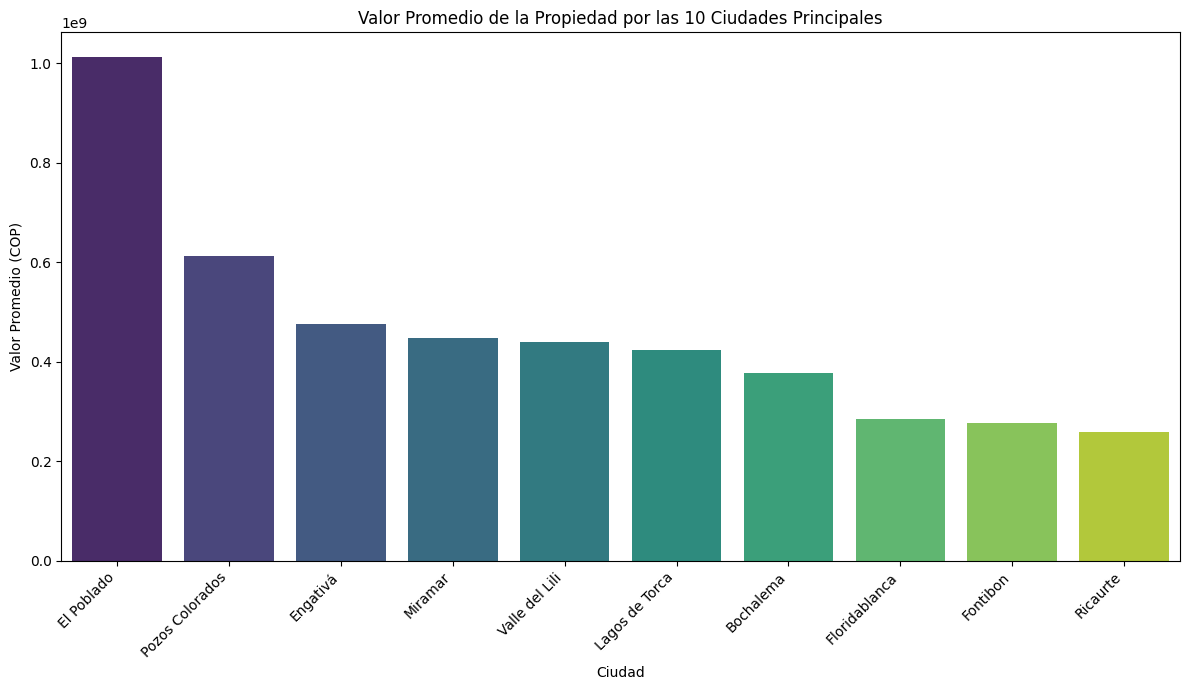

In [8]:
# Gráfico de dispersión para 'area' y 'valor_cop'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_anuncios, x='area', y='valor_cop', alpha=0.6)
plt.title('Gráfico de dispersión del valor de la propiedad vs. Área')
plt.xlabel('Área (m²)')
plt.ylabel('Valor (COP)')
plt.grid(True)
plt.show()

# Gráfico de dispersión para 'Cuartos' y 'valor_cop'
df_numeric_cuartos = df_anuncios[df_anuncios['Cuartos'].apply(lambda x: isinstance(x, (int, float)))]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_numeric_cuartos, x='Cuartos', y='valor_cop', alpha=0.6)
plt.title('Gráfico de dispersión del valor de la propiedad vs. Número de Cuartos')
plt.xlabel('Número de Cuartos')
plt.ylabel('Valor (COP)')
plt.grid(True)
plt.show()

# Matriz de correlación para variables numéricas
df_numeric = df_anuncios[['valor_cop', 'area', 'Cuartos']].copy()
# Convertir 'Cuartos' a numérico
df_numeric['Cuartos'] = pd.to_numeric(df_numeric['Cuartos'], errors='coerce')
correlation_matrix = df_numeric.corr()

print("\nMatriz de Correlación:")
display(correlation_matrix)

# Diagramas de caja para 'valor_cop' por 'tipo'
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_anuncios, x='tipo', y='valor_cop')
plt.title('Diagrama de Caja del Valor de la Propiedad por Tipo')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Valor (COP)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Explorando la relación entre 'Ciudad' y 'valor_cop' para las ciudades más frecuentes
top_cities = df_anuncios['Ciudad'].value_counts().nlargest(10).index
df_top_cities = df_anuncios[df_anuncios['Ciudad'].isin(top_cities)]

# Calcular el valor promedio por ciudad
mean_value_by_city = df_top_cities.groupby('Ciudad')['valor_cop'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=mean_value_by_city.index, y=mean_value_by_city.values, palette='viridis')
plt.title('Valor Promedio de la Propiedad por las 10 Ciudades Principales')
plt.xlabel('Ciudad')
plt.ylabel('Valor Promedio (COP)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Resumen de Hallazgos Clave de la Exploración de Datos

1. Calidad de los Datos y Estructura del DF
- El DF 'df_anuncios' contiene 657 filas y 10 columnas.
- Las columnas incluyen variables numéricas ('valor_cop', 'area', 'Cuartos') y categóricas ('tipo', 'Ciudad', 'habitaciones').
- La variable objetivo para el modelo de regresión es 'valor_cop'. Las variables predictoras identificadas son 'area', 'Cuartos', 'tipo', 'Ciudad', y potencialmente 'habitaciones'.

2. Análisis Univariado
- **Variables Numéricas:**
  - 'valor_cop': Su distribución es fuertemente asimétrica a la derecha, indicando que la mayoría de las propiedades tienen valores bajos. Existen  valores atípicos altos lo que indicaría que se debe considerar al momento de probar diversos modelos.
  - 'area': También muestra una distribución asimétrica a la derecha, similar a la columna anterior.

- **Variables Categóricas:**
  - 'tipo': 'Apartamento' y 'Casa' son los tipos de inmuebles más frecuentes.
  - 'Ciudad': Existe una alta variabilidad,. La distribución está concentrada en unas pocas ciudades principales, lo que nos indica que es importante para poder implementar un modelo. Lo mejor seria lematizar para poder tener este dato numerico e incluirlo en el análisis.
  - 'habitaciones': Los valores de 2 y 3 cuartos, con una distribución menos asimétrica.

### 2. Análisis Bivariado
- La matriz de correlación entre las variables numéricas ('valor_cop', 'area', 'Cuartos') mostró correlaciones positivas:

In [9]:
display(correlation_matrix)

,valor_cop,area,Cuartos
valor_cop,1.000000,0.164271,0.483583
area,0.164271,1.000000,0.296932
Cuartos,0.483583,0.296932,1.000000


  - 'valor_cop' y 'Cuartos' tienen una correlación moderada (0.48).
  - 'valor_cop' y 'area' tienen una correlación más débil (0.16). Aunque hay una tendencia a que el valor aumente con el área y el número de cuartos, la relación no necesariamente es lineal y existen otros factores que son importantes.
  - El análisis de 'valor_cop' por categorías mostró que:
    - El 'tipo' de inmueble tiene un impacto importante en el valor.
    - La 'Ciudad' es determinante del valor.